# LATAR BELAKANG
seorang investor merencanakan untuk berinvestasi pada pemilik property yang mendaftarkan property nya pada aplikasi airbnb

## Pernyataan Masalah
investor membutuhkan beberapa informasi terkait host_name/ **pemilik property yang memiliki pengasilan tertinggi** dari airbnb untuk menawarkan kerjasama/ inventasi 

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**bagaimana karakteristik airbnb yang memiliki banyak pelanggan dan berpenghasilan tinggi**

## Data

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait type ruangan, harga sewa, ulasan, dan minimun masa inap. Ada 16 kolom di dalam dataset Airbnb Listings Bangkok, yaitu:  
1. id             :Identitas unik Airbnb untuk tempat tersebut
2. name           :Nama tempat
3. host_id        :Pengidentifikasi unik Airbnb untuk tuan rumah/pengguna.
4. host_name      :Nama tuan rumah. Biasanya, hanya nama depan saja.
5. neighborhood   :Kode geografis menggunakan garis lintang dan bujur terhadap lingkungan yang ditentukan oleh shapefile digital terbuka atau publik.
6. latitude       :Proyeksi Sistem Geodesi Dunia (WGS84) untuk garis lintang dan garis bujur.
7. longitude      :Proyeksi Sistem Geodesi Dunia (WGS84) untuk garis lintang dan garis bujur.
8. room_type      :Type Ruangan
9. price          :Harga harian dalam mata uang lokal
10. minimum_nights:Jumlah minimum masa inap malam untuk tempat tersebut (peraturan kalender mungkin berbeda)
11. number_of_reviews     :Jumlah ulasan yang dimiliki listingan
12. last_review           :Tanggal review terakhir/terbaru.
13. reviews_per_month     :Review perbulan
14. calculated_host_listings_count:Jumlah listing yang dimiliki tuan rumah saat ini dalam geografi kota/wilayah.
15. availability_365      :ketersediaan kamar
16. number_of_reviews_ltm :Jumlah ulasan yang dimiliki listingan (dalam 12 bulan terakhir).

In [166]:
df=pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Understanding 
Sebelum melakukan analisis, kita perlu memahami dulu dataset yang akan kita analisis dalam tahapan *data understanding*. Dari data understanding, kita akan mengetahui anomali-anomali apa saja yang terdapat di dalam dataset yang perlu ditangani dalam tahapan *data cleaning*.

In [167]:
print(f'Jumlah baris dan kolom di dataset Airbnb Listings Bangkok adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset Airbnb Listings Bangkok adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_review

In [168]:
df.isnull().any()

Unnamed: 0                        False
id                                False
name                              True 
host_id                           False
host_name                         False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       True 
reviews_per_month                 True 
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
dtype: bool

In [169]:
df.isnull().sum()

Unnamed: 0                        0   
id                                0   
name                              8   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

In [170]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15854,15854,15854,10064
unique,14794,5313,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [171]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name','Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

Secara umum, kita bisa melihat bahwa:
* dataset Airbnb Listings Bangkok memiliki 17 kolom dan 15854 baris
* beberapa kolom, yaitu,`name`, `last_review` dan `review_per_month` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `id` berisikan id unik untuk tiap penyewa dan yang menyewakan sehingga tidak relevan dalam analisis dan bisa dihapus saja.

## Data Cleaning/Cleansing
Data Cleansing dilakukan untuk mendeteksi dan menangani inkonsistensi dalam data kita untuk meningkatkan kualitas.

### Missing Value

In [172]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Unnamed: 0                        0.000000 
id                                0.000000 
name                              0.050460 
host_id                           0.000000 
host_name                         0.000000 
neighbourhood                     0.000000 
latitude                          0.000000 
longitude                         0.000000 
room_type                         0.000000 
price                             0.000000 
minimum_nights                    0.000000 
number_of_reviews                 0.000000 
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count    0.000000 
availability_365                  0.000000 
number_of_reviews_ltm             0.000000 
dtype: float64

<Axes: >

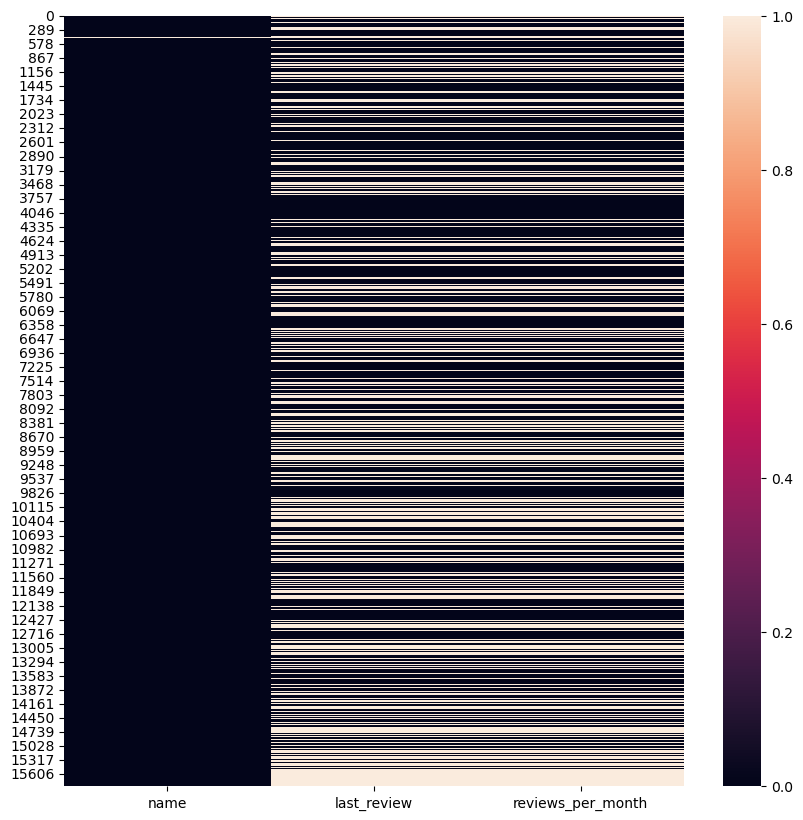

In [173]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','last_review','reviews_per_month']].isna())

setelah melihat gambaran kasar anomali di dalam dataset Airbnb Listings Bangkok, sekarang tangani tiap-tiap anomali secara lebih jauh.  

#### `name`
Untuk penanganan data kosong pada kolom `name` ini, karena proporsinya tidak banyak dan memang tidak ada cara yang dirasa sesuai untuk mengisi data kosongnya, maka kita bisa dihapus saja.

In [174]:
# menghapus data kosong
df.dropna(subset=['name'],inplace=True)

In [175]:
df.isna().sum()

Unnamed: 0                        0   
id                                0   
name                              0   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

#### `last_review` 
Untuk penanganan data kosong pada kolom `last_review` ini, karena proporsinya banyak sehingga alternatif penghapusan data tidak cocok, untuk itu kita akan coba mengisi data kosong tersebut dengan nilai konstan, mengapa tidak menggunakan mean, median dan modus? karena data kosong cukup banyak sehingga tidak relevan apabila mengguankan mean, median dan modus sehingga akan merubah distribusi data asli.

In [176]:
# jumlah missing value di kolom `last_review` & `reviews_per_month`
df[['last_review']].isna().sum()

last_review    5784
dtype: int64

In [177]:
df['last_review']=df['last_review'].fillna('unknown')

In [178]:
df.isna().sum()

Unnamed: 0                        0   
id                                0   
name                              0   
host_id                           0   
host_name                         0   
neighbourhood                     0   
latitude                          0   
longitude                         0   
room_type                         0   
price                             0   
minimum_nights                    0   
number_of_reviews                 0   
last_review                       0   
reviews_per_month                 5784
calculated_host_listings_count    0   
availability_365                  0   
number_of_reviews_ltm             0   
dtype: int64

#### `reviews_per_month` 
Untuk penanganan data kosong pada kolom `reviews_per_month` ini, karena proporsinya banyak sama seperti kolom `last_review` sehingga alternatif penghapusan data tidak cocok, untuk itu kita akan coba mengisi data kosong tersebut dengan beberapa cara berikut

mengisi missing value pada kolom `reviews_per_month` dengan nilai rata-rata (mean)

In [179]:
df['reviews_per_month']=df['reviews_per_month'].fillna('unknown')

In [180]:
df.isna().sum()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## Data Sudah Bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [181]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15846, 17)


,dataFeatures,dataType,null,unique,uniqueSample
0,Unnamed: 0,int64,0,15846,"[5271, 5815]"
1,id,int64,0,15846,"[19066156, 569139554788004530]"
2,name,object,0,14794,"[ริมวิภา RimVibha, Studio 40 sqm 2 minutes walks BTS PhraKhanong R3]"
3,host_id,int64,0,6652,"[81770110, 263365833]"
4,host_name,object,0,5307,"[Patiphat, Kunjira]"
5,neighbourhood,object,0,50,"[Khan Na Yao, Lat Krabang]"
6,latitude,float64,0,9603,"[13.78761, 13.77511]"
7,longitude,float64,0,10223,"[100.57428, 100.50383]"
8,room_type,object,0,4,"[Private room, Shared room]"
9,price,int64,0,3040,"[6403, 827]"


# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana karakteristik airbnb yang memiliki banyak pelanggan dan berpenghasilan tinggi** 

analisis akan dilakukan dengan melihat harga dan jumlah pelanggan airbnb pada data set Airbnb Listings Bangkok

In [182]:
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,unknown,unknown,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,unknown,unknown,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,unknown,unknown,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,unknown,unknown,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,unknown,unknown,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,unknown,unknown,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,unknown,unknown,14,365,0


buat kolom baru yang berisikan jumlah hari yang tersewa dalam kurun waktu 1 tahun

In [199]:
df['jumlah_hari_sewa']= round(365-df['availability_365'])


setelah itu kita kalikan harga dengan jumlah hari yang tersewa selama 1 tahun untuk melihat berapa banyak keuntungan yang didapatkan oleh pemilik property airbnb

In [200]:
df['keuntungan_sewa_setahun']=round(df['price']* df['jumlah_hari_sewa'])

setelah mengetahui 10 host_name dengan penghasilan tertinggi di airbnb, selanjutnya kita akan melihat berapa cost/biaya pemeliharaan yang harus dikeluarkan oleh pemilik property selama satu tahun berdasarkan type room dan berapa kali property tersebut tersewa sehingga akan menghasilkan keuntungan bersih dan juga menjadi pertimbangan bagi investor untuk menanam modal pada host_name yang memiliki penghasilan tertinggi.

kita asumsikan biaya pemeliharaan property setiap selesai digunakan adalah 20% dari biaya sewa permalam sehingga didapatkan data sbb

In [206]:
df['biaya_pemeliharaan']=round(df['price']*0.2)


In [203]:
df['berapa_kali_tersewa']= round(df['jumlah_hari_sewa']/df['minimum_nights'])

In [207]:
df['total_biaya_pemeliharaan_setahun']=round(df['biaya_pemeliharaan']*df['berapa_kali_tersewa'])

In [204]:
df['Keuntungan_bersih']= round(df['keuntungan_sewa_setahun']-df['total_biaya_pemeliharaan_setahun'])

lalu diurutkan 10 airbnb yang memiliki keuntungan terbesar dalam 1 tahun 

In [209]:
df.sort_values('Keuntungan_bersih', ascending=False).head(10)


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,jumlah_hari_sewa,keuntungan_sewa_setahun,biaya_pemeliharaan,berapa_kali_tersewa,Keuntungan_bersih,total_biaya_pemeliharaan_setahun
12300,12300,562972065309061724,3B中文No Guest Service Fee@Nana Asok/Soi11 Nightlife,131427125,Jj,Vadhana,13.74666,100.55910,Entire home/apt,1014758,...,0.32,10,75,2,290,294279820,202952.0,10.0,292317955.0,2029520.0
9345,9345,39858231,1BR cozy condo close to ONNUT BTS.,210559448,Cora,Khlong Toei,13.70496,100.59151,Entire home/apt,1000000,...,0.05,6,88,0,277,277000000,200000.0,11.0,274784000.0,2200000.0
6289,6289,29909847,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,210559448,Cora,Khlong Toei,13.70333,100.59247,Entire home/apt,1000000,...,1.39,6,90,0,275,275000000,200000.0,138.0,247500000.0,27600000.0
1239,1239,8880974,"Modern,wifi,5m MRT&2 Shopping Mall",30803267,Yasmine,Huai Khwang,13.75995,100.56936,Entire home/apt,1000000,...,0.51,4,180,0,185,185000000,200000.0,2.0,184630000.0,400000.0
1779,1779,11579635,"2 Bedroom,wifi,5mMRT&Shopping Mall",30803267,Yasmine,Huai Khwang,13.75471,100.56598,Entire home/apt,1000000,...,0.64,4,249,0,116,116000000,200000.0,1.0,115768000.0,200000.0
6549,6549,31365769,"WH (container, Double bed, 2ppl -F)",234881965,Napawadee,Khlong Toei,13.73514,100.55217,Private room,372227,...,0.5,4,147,0,218,81145486,74445.0,218.0,64916389.0,16229010.0
4194,4194,22059876,C,160989331,Annchalee,Thon buri,13.71693,100.48330,Private room,161516,...,0.05,1,0,0,365,58953340,32303.0,1.0,58929759.0,32303.0
6760,6760,31364368,"WH (Container style, twin bed, 2ppl, citycenter-A)",234881965,Napawadee,Khlong Toei,13.73505,100.55239,Private room,314899,...,0.1,4,147,0,218,68647982,62980.0,218.0,54918386.0,13729640.0
6547,6547,31365499,"WH (Container style, twin bed, 2ppl, citycenter-B)",234881965,Napawadee,Khlong Toei,13.73635,100.55277,Private room,314841,...,0.33,4,147,0,218,68635338,62968.0,218.0,54908270.0,13727024.0
12792,12792,629653142142561774,rm 6 : bright morning sunlight.,117057915,Jeab,Bang Phlat,13.79049,100.48816,Private room,400717,...,unknown,5,241,0,124,49688908,80143.0,124.0,39751126.0,9937732.0


setelah kita mendapatkan 10 data keuntungan terbesar penyewaan airbnb dalam 1 tahun, kita cek apa saja karakteristik dari airbnb yang memiliki keuntungan tertinggi dibanding airbnb lainnya.

berdasarkan type ruangan 

TypeError: 'str' object is not callable

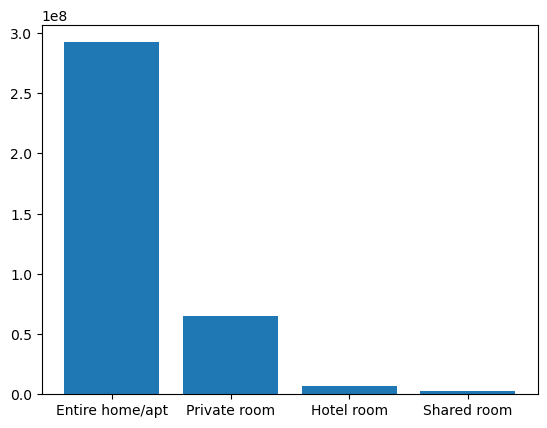

In [217]:
room_type= df['room_type']
keuntungan_bersih= df['Keuntungan_bersih']

plt.bar(room_type,keuntungan_bersih)

plt.xlabel('Tipe_Ruangan')
plt.ylabel('Keuntungan')
plt.title('Pengaruh_type_room_terhadap_keuntungan')

berdasarkan harga sewa 

In [ ]:
harga_sewa= df['price']
keuntungan_bersih= df['Keuntungan_bersih']

plt.bar(harga_sewa,keuntungan_bersih)

plt.xlabel('Harga Sewa')
plt.ylabel('Keuntungan')
plt.title('Pengaruh_harga_sewa_terhadap_keuntungan')
plt.show

berdasarkan minimum sewa

TypeError: 'str' object is not callable

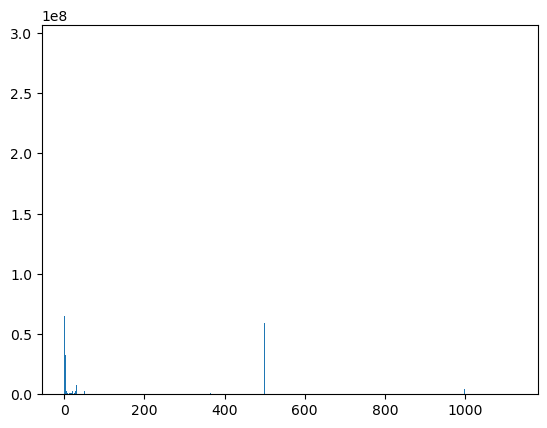

In [224]:
minimum_sewa= df['minimum_nights']
keuntungan_bersih= df['Keuntungan_bersih']

plt.bar(minimum_sewa,keuntungan_bersih)

plt.xlabel('Minimum Sewa')
plt.ylabel('Keuntungan')
plt.title('Pengaruh_harga_sewa_terhadap_keuntungan')

In [210]:
mean = df1['price'].mean()
mean

3218.464849173293

In [211]:
mean_pertahun= df1['keuntungan_sewa_setahun'].mean()
mean_pertahun

385831.27742016915

In [212]:
df.to_csv('Airbnb Listings Bangkok bersih.csv')

# Kesimpulan dan Rekomendasi 

## Kesimpulan
Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan karakteristik airbnb yang memiliki penghasilan tertinggi sbb:
* Pemilik property yang menghasilkan keuntungan terbesar adalah pemilik property dengan type room Entire home/apt & private room.
* Harga sewa property yang menghasilkan keuntungan terbesar lebih tinggi dari pada rata-rata harga sewa airbnb di bangkok
* Minimum sewa untuk property yang berpenghasilan tinggi bervariatif ada yang bisa disewakan perhari atau disewakan per 30 hari, namun rata-rata property yang berpenghasilan tinggi memiliki minimum sewa yang cukup lama >30 hari.
* Rata-rata keuntungan pertahun pemilik property yang ada dibangkok adalah 385.831 bath atau sekitar Rp 162.816.999

## Rekomendasi 
1. Investor dapat melakukan investasi pada 10 pemilik property dengan penghasilan tertinggi seperti pada grafik
2. Investor dapat mempertimbangkan untuk berinvestasi pada pemilik property yang menyewakan property dengan harga mahal namun memiliki cukup pelanggan daripada pada pemilik property yang menyewakan property dengan harga murah namun banyak pelanggan, karena setiap selesai digunakan akan ada biaya pemeliharaan gedung yang biayanya cukup besar sehingga mengurangi profit yang didapatkan 
4. Fokus pada pemilik property yang menyewakan property dengan type kamar room Entire home/apt & private room, karena memiliki cukup banyak peminat 

Dengan mempersempit *pool* pemilihan pemilik property untuk menjalin kerjasama (investasi), diharapkan analisis ini bisa membantu dan memudahkan investor untuk berinvestasi pada pemilik property airbnb.
